# Buổi 6: Thuật toán sắp xếp (phần 2)
- Tìm hiểu về Merge sort
- Tìm hiểu về Quicksort

In [2]:
import matplotlib.pyplot as plt

def show_list(arr, title=''):
    fig, ax = plt.subplots(figsize=(20, 4)) # Tạo một figure (khung chính) và axes (trục biểu đồ).
    ax.bar(range(len(arr)), arr) # ax là đối tượng Axes, đại diện cho khu vực biểu đồ 
    ax.set_title(title) 
    ax.set_xlabel('index')
    ax.set_xticks(range(len(arr)))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.show()

## 1. Merge Sort
**Bài toán**: Như các thuật toán đã học, Merge Sort (sắp xếp trộn) xử lý bài toán sắp xếp dãy bất kỳ bằng phương pháp so sánh các phần tử 

Cho một dãy gồm 0 < n < 10^6  số nguyên, mỗi số có giá trị trong khoảng [0, 10<sup>9</sup>], sắp xếp dãy trên theo thứ tự tăng dần.

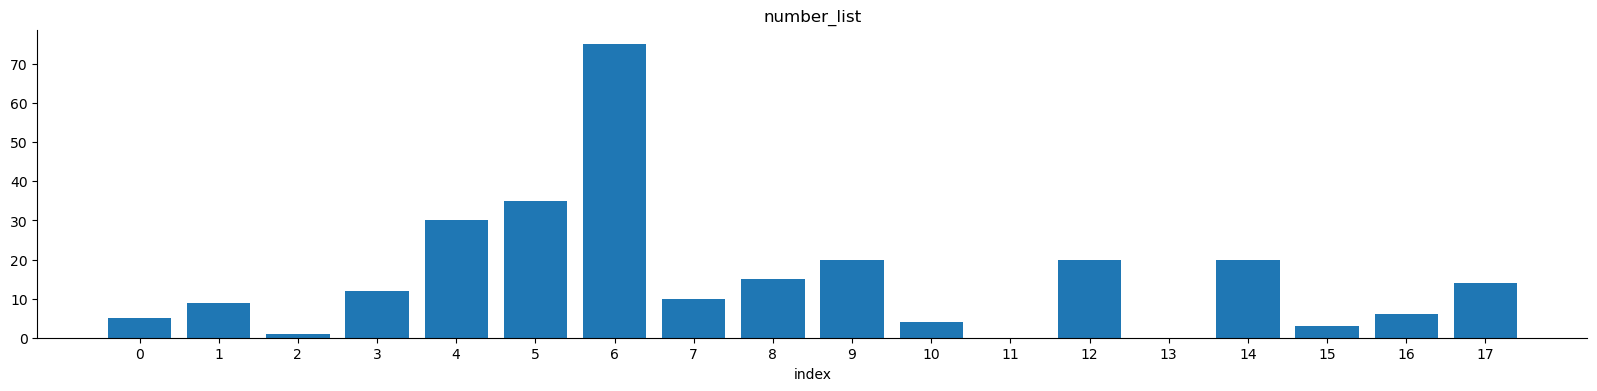

In [3]:
number_list = [5, 9, 1, 12, 30, 35, 75, 10, 15, 20, 4, 0, 20, 0, 20, 3, 6, 14]
show_list(number_list, 'number_list')

**Cách tiếp cận** của Merge Sort sử dụng phương pháp *chia để trị*:
1. Chia dãy cần sắp xếp thành hai phần có độ dài tương đương nhau.
2. Sắp xếp riêng từng phần.
3. Nhập hai phần đã sắp xếp lại.  

Ở bước 2, thuật toán cũng dùng Merge Sort để tiếp tục sắp xếp riêng từng phần cho đến khi các phần được chia nhỏ đến kích thước bằng 1 (xem như đã được sắp xếp).  

Nhờ phương pháp này, Merge Sort có độ phức tạp về thời gian là *O(n.log(n))*, nhanh hơn rất nhiều so với các thuật toán ở bài học trước.  

Sơ đồ cây thể hiện quá trình xử lý của Merge Sort:
![](./assets/merge-sort.png)
<div style='text-align: right'><i>Ảnh: geeksforgeeks.org/merge-sort/</i></div>

Visualization: https://visualgo.net/en/sorting, thuật toán thứ tư.

In [4]:
def merge(arr, left, right, mid): ## 1,2,3,4,5
    arr1 = arr[left:mid]
    arr2 = arr[mid:right] 
    
    n1 = len(arr1)
    n2 = len(arr2)
    
    i = j = 0
    k = left
    
    # Duyệt qua arr1 và arr2 cho đến khi một trong 2 mảng rỗng
    while  i < n1 and j < n2: 
        if arr1[i] < arr2[j]:
            arr[k] = arr1[i]
            i += 1
        else:
            arr[k] = arr2[j]
            j += 1
        k += 1
        
    # Lấy các phần tử còn lại 
    arr[k: k+n1-i] = arr1[i:n1]
    k += n1-i
    arr[k:k+n2-j] = arr2[j:n2]
    
    
def merge_sort(arr, left, right):
    # Trường hợp đặc biệt, mảng được sắp xếp 
    if right - left <= 1: # điều kiện dừng đệ quy 
        return
    # Chia mảng thành hai nửa, sau đó sắp xếp từng nửa riêng lẻ
    mid = (left + right) // 2
    merge_sort(arr, left, mid) ## Đệ quy
    merge_sort(arr, mid, right)  ## Đệ quy
    
    # Hợp nhất hai nữa đã sắp xếp
    merge(arr, left, right, mid)

Before sorting: [5, 9, 1, 12, 30, 35, 75, 10, 15, 20, 4, 0, 20, 0, 20, 3, 6, 14]
After sorting: [0, 0, 1, 3, 4, 5, 6, 9, 10, 12, 14, 15, 20, 20, 20, 30, 35, 75]


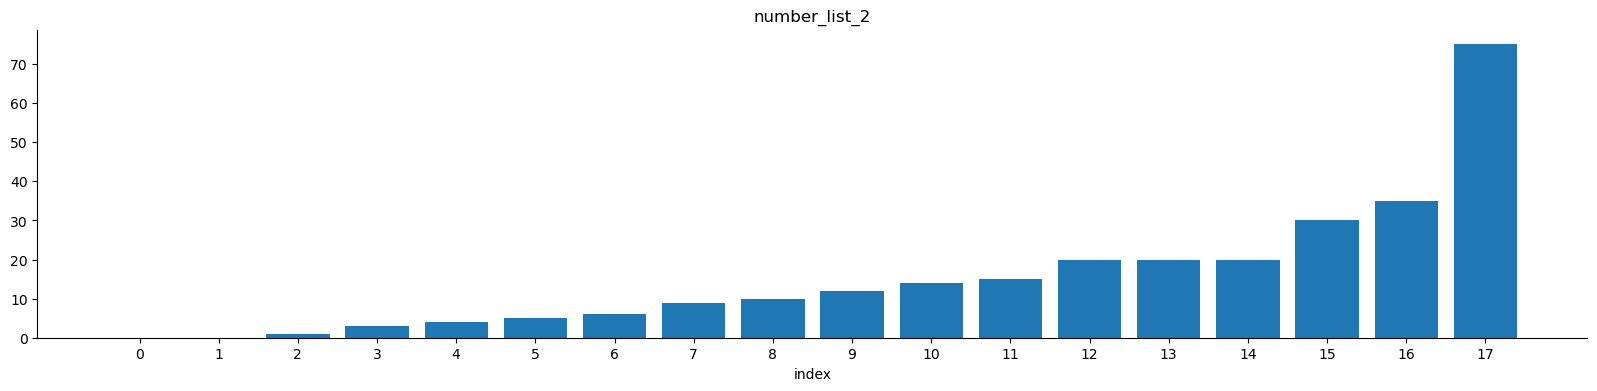

In [6]:
number_list_2 = number_list[:]
merge_sort(number_list_2, 0, len(number_list_2))

print("Before sorting: {}".format(number_list))
print("After sorting: {}".format(number_list_2))
show_list(number_list_2, 'number_list_2')   